Data 
-----
https://www.opm.gov/data/
U.S. Office of Personnel Management
FedScope Separations Cube (2005 - 2015) 


Variables
----------

AGYSUB- The employing organization. The dataset has been limited to cabinet organizations (Executive Departments only)
     AF: Department of the Airforce
     AG: Department of Agriculture  
     AR: Department of the Army 
     CM: Department of Commerce
     DD: Department of Defense 
     DJ: Department of Justice 
     DL: Department of Labor 
     DN: Department of Energy 
     ED: Department of Education  
     HE: Department of Health and Human Services
     HS: Department of Homeland Security 
     HU: Department of Housing and Urban Development  
     IN: Department of the Interior 
     NV: Department of the Navy
     ST: Department of the State
     TD: Department of Transportation 
     TR: Department of the Treasury 
     VA: Department of Veterans Affairs 

SEP- Separations 
    Quits: Voluntary resignation by an employee, abandoning one's position, joining the military, or failing to return
    from military furlough. Quits also include separations by the agency if an employee declines a new position or
    relocation.

EFDATE- YYYMMM

AGELVL- Age, displayed in five year intervals except or an initial interval of less than 20 years and a final interval of 65 years or more 

GENDER- M/F

GSEGRD- The General Schedule grade for pay plans in the General Schedule and Equivalent pay plan category (See Pay Plan & Grade).

LOSLVL- Length of Service, The number of years of Federal civilian employment, creditable military service, and other service made creditable by specific legislation. Length of service is grouped by five-year intervals, except for:
    a. the initial intervals of less than 1 year, 1 2 years, and 3-4 years and
    b. thefinalintervalof35yearsormore.

LOC- Location 

PATCO- Occupation Category; Occupational categories are defined by the educational requirements of the occupation and the subject matter and level of difficulty or responsibility of the work.

PPGRD- Pay Plan & Grade; The pay system and, where applicable, the grade used to determine an employee's basic pay rate. Grade denotes a hierarchical position in a pay plan and is sometimes referred to as level, class, rank, or pay band.

SALLVL- Salary Level; An employee’s adjusted basic pay, which is an annualized rate of pay. Adjusted basic pay is the sum of an employee’s rate of basic pay plus any locality comparability payment and/or special pay adjustment for law enforcement officers. Salaries are grouped by $10,000 intervals, except for an initial interval of less than $20,000 and a final interval of $180,000 or more.

An employee's actual earnings may be more or less than the annualized rate because of factors such as overtime, shift differentials, less than full time work, or leave without pay.

TOA- Type of Appointment; An employee's appointment in terms of permanence and competitiveness.


WORKSCH- Work Schedule; The time basis on which an employee is scheduled to work.

SALARY- Average Salary; A measure representing the average adjusted basic pay, an annualized rate of pay. Adjusted basic pay is the sum of an employee’s rate of basic pay and any locality comparability payment and/or special pay adjustment for law enforcement officers.
An employee's actual earnings may be more or less than the annualized rate because of factors such as overtime, shift differentials, less than full time work, or leave without pay.

Invalid salary values are excluded from the average. A large number of invalid values could invalidate the average. To obtain counts of invalid values, display the data using the Salary Level dimension (See Salary Level).

LOS- Average Length of Service; A measure representing the average number of years of Federal civilian employment and creditable military service.

# Import Pacakges

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime 

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')



# Import Data

In [2]:
#Import Employment Data

emp05 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2005.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp06 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2006.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp07 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2007.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp08 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2008.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp09 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2009.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp10 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2010.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp11 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2011.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp12 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2012.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp13 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2013.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp14 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2014.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)
emp15 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Employment/FACTDATA_SEP2015.TXT', usecols=["AGELVL", "AGYSUB", "DATECODE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "TOA", "WORKSCH"], header=0)

empframes = [emp05, emp06, emp07, emp08, emp09, emp10, emp11, emp12, emp13, emp14, emp15]
emp_df = pd.concat(empframes)


/Users/shaniselukie/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shaniselukie/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Import Separation Data 
sep05 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2005.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep06 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2006.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep07 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2007.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep08 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2008.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep09 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2009.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep10 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2010.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep11 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2011.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep12 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2012.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep13 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2013.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep14 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2014.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sep15 = pd.read_csv('/Users/shaniselukie/Desktop/FedScope Separations/SEPDATA_FY2015.TXT', usecols=["AGELVL", "AGYSUB", "EFDATE", "GSEGRD", "LOC", "LOSLVL", "PATCO", "SALLVL", "SEP", "TOA", "WORKSCH"], header=0)
sepframes = [sep05, sep06, sep07, sep08, sep09, sep10, sep11, sep12, sep13, sep14, sep15]
sep_df = pd.concat(sepframes)

/Users/shaniselukie/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shaniselukie/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
emp_df = pd.concat(empframes)

sep_df = pd.concat(sepframes)

# Clean Data 

In [46]:
def clean(df):    
    #Make Int 
    df['LOC'] = pd.to_numeric(df['LOC'], errors='coerce')
    df['GSEGRD'] = pd.to_numeric(df['GSEGRD'], errors='coerce')
    df['TOA'] = pd.to_numeric(df['TOA'], errors='coerce')
    
    #Drop Non Full-Time employees 
    Non_F = ['I', 'J', 'P', 'Q', 'R', 'S', 'T', 'G', 'H']
    df = df[~df.WORKSCH.isin(Non_F)] 

    #Drop Non Permanent employees
    Non_P = ['20', '40', '42', '44', '46', '48', '60', '65']
    df = df[~df.TOA.isin(Non_P)] 

    #Keep cabinet level agencies only
    cabinet = 'AF', 'AG', 'AR', 'CM', 'DD', 'DJ', 'DL', 'DN', 'ED', 'HE', 'HS', 'HU', 'IN', 'NV', 'ST', 'TD', 'TR', 'VA'
    subset = df.AGYSUB.map(lambda x: x.startswith(cabinet))
    df.AGYSUB = [x[0:2] for x in df.AGYSUB]
    df = df[subset]

    return df

In [47]:
sep_df = clean(sep_df)
emp_df = clean(emp_df)

In [50]:
#Create Dependent Var 
Non_Quit = ['SA', 'SB', 'SD', 'SE', 'SF', 'SG', 'SH', 'SI', 'SJ', 'SK', 'SL']
sep_df = sep_df[~sep_df.SEP.isin(Non_Quit)] 
sep_df.SEP = sep_df.SEP.replace('SC', 1).astype('int')

emp_df['SEP'] = np.nan
emp_df.SEP = emp_df.SEP.replace(np.nan, 0).astype('int')

In [51]:
#Set Date
def time(df, col_name):
    df['DATE'] = pd.to_datetime(df[col_name], format = '%Y%m').dt.strftime('%Y')
    return df.head()

time(sep_df, 'EFDATE')
time(emp_df, 'DATECODE')

sep_df.drop('EFDATE', axis=1, inplace=True)
emp_df.drop('DATECODE', axis=1, inplace=True)

#Drop Null Values
sep_df = sep_df.dropna()
emp_df = emp_df.dropna()


emp_copy = emp_df.copy()
sep_copy = sep_df.copy()

In [52]:
#Create categories - https://www.continuum.io/content/pandas-categoricals
def catcodes(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df[column_name] = df[column_name].cat.remove_unused_categories()
    df[column_name] = df[column_name].cat.codes
    
    return df[column_name]

col_list = ['AGELVL', 'GSEGRD', 'LOSLVL', 'LOC', 'PATCO','SALLVL']
for x in col_list: 
    catcodes(sep_df, x)
    catcodes(emp_df, x)

In [53]:
#Create Master Data
columnsTitles = ['AGYSUB', 'AGELVL', 'DATE', 'GSEGRD', 'LOC', 'LOSLVL', 'PATCO', 'SALLVL', 'SEP', 'TOA', 'WORKSCH']

sep_df = sep_df.reindex(columns=columnsTitles)
emp_df = emp_df.reindex(columns=columnsTitles)

sep_copy = sep_copy.reindex(columns=columnsTitles)
emp_copy = emp_copy.reindex(columns=columnsTitles)

master_df = pd.concat([sep_df, emp_df])

# Trends in the Federal Workforce 

# Proportion of Separated Employees 

In [54]:
#Separation Agency Counts
Sep_Count = pd.Series(pd.value_counts(sep_df['AGYSUB']), name='SepCount')
Emp_Count = pd.Series(pd.value_counts(emp_df['AGYSUB']), name='EmpCount')

Count_data = pd.concat([Sep_Count, Emp_Count], axis=1)
Count_data

,SepCount,EmpCount
AF,39003,1063435
AG,53534,929356
AR,71324,1744933
CM,8004,266476
DD,13119,684303
DJ,17106,687818
DL,4575,164188
DN,2967,121980
ED,1486,41819
HE,19582,616274


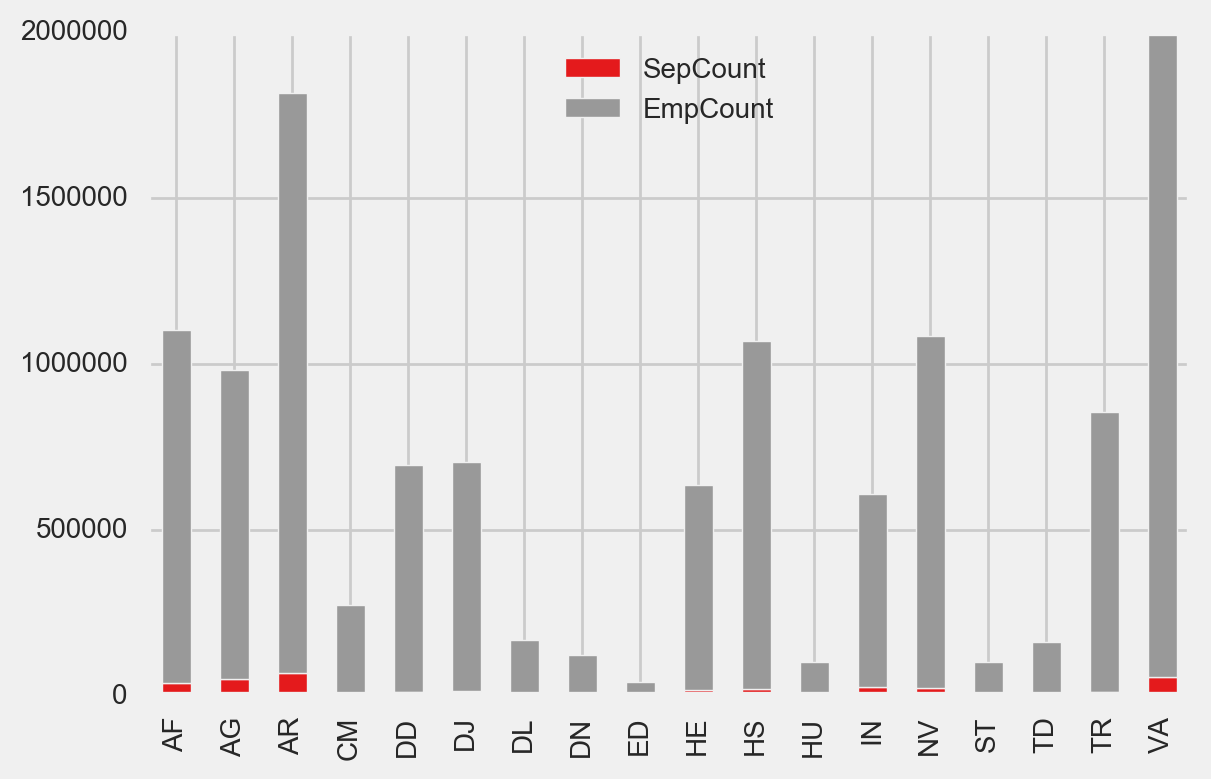

In [55]:
#Perspective: Employees that quit compared to entire Agency 
Count_data.plot(kind="bar",stacked=True, colormap="Set1")

# Descriptive Statistics 

In [13]:
#sns.jointplot(x="LOS", y="SALLVL", data=master_df, kind="scatter", xlim=(0,75), ylim=(0,350000))


## Countplot of Key Variables

In [58]:
key_var = ['AGELVL', 'GSEGRD', 'LOSLVL', 'PATCO', 'SALLVL']

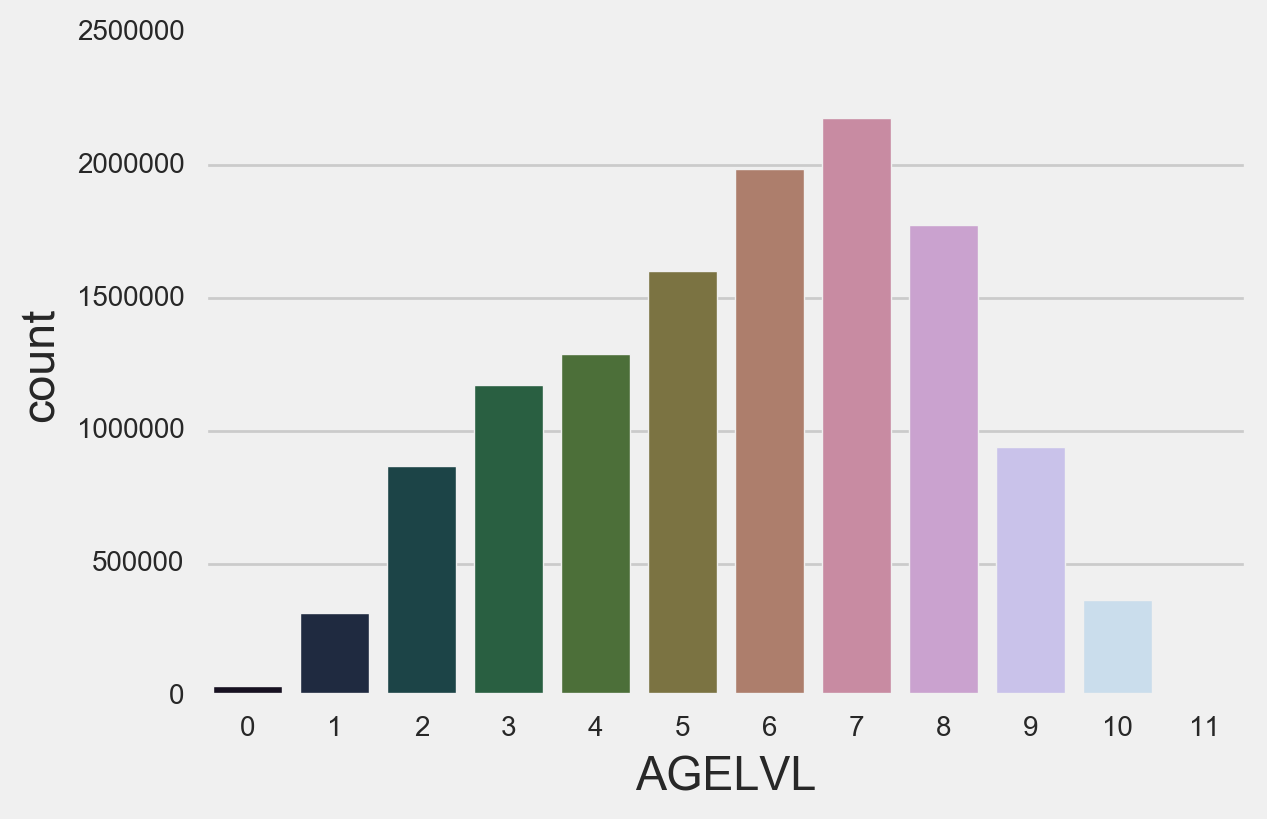

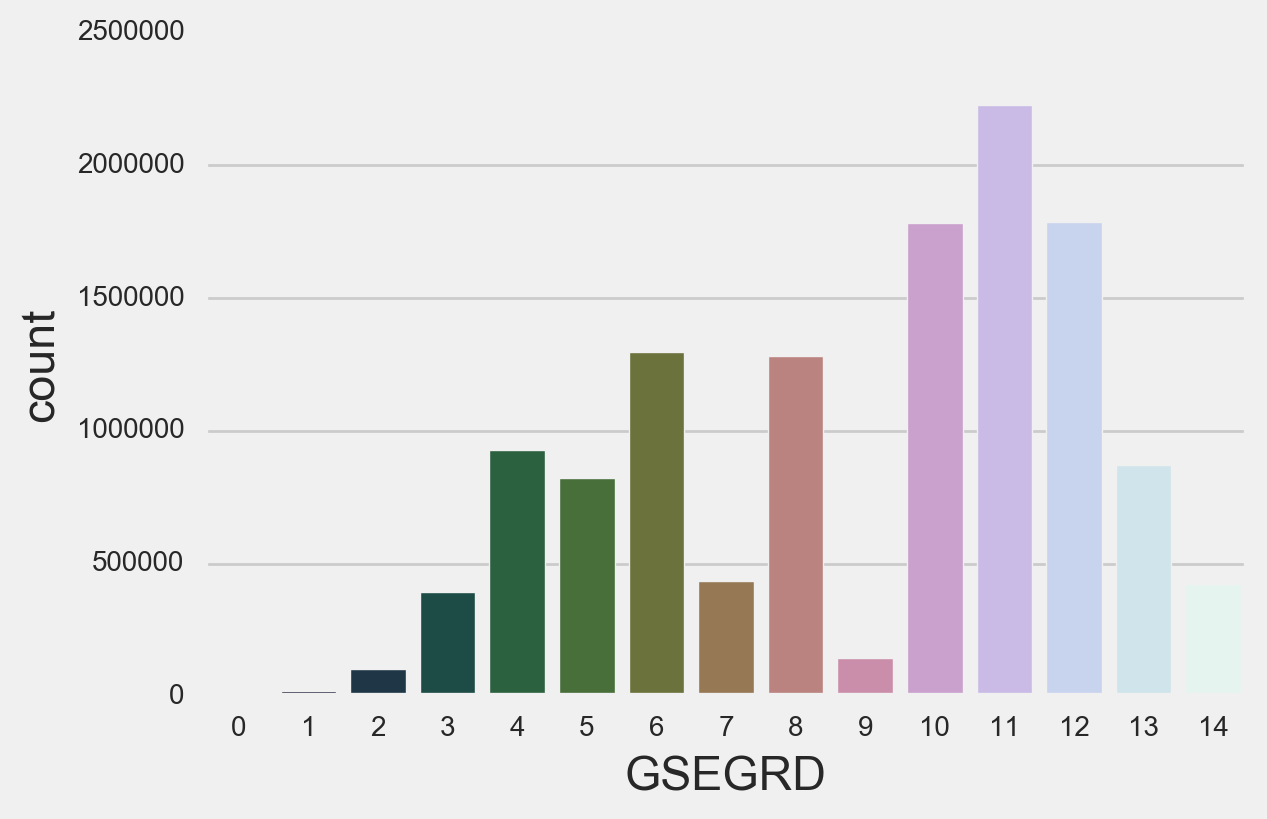

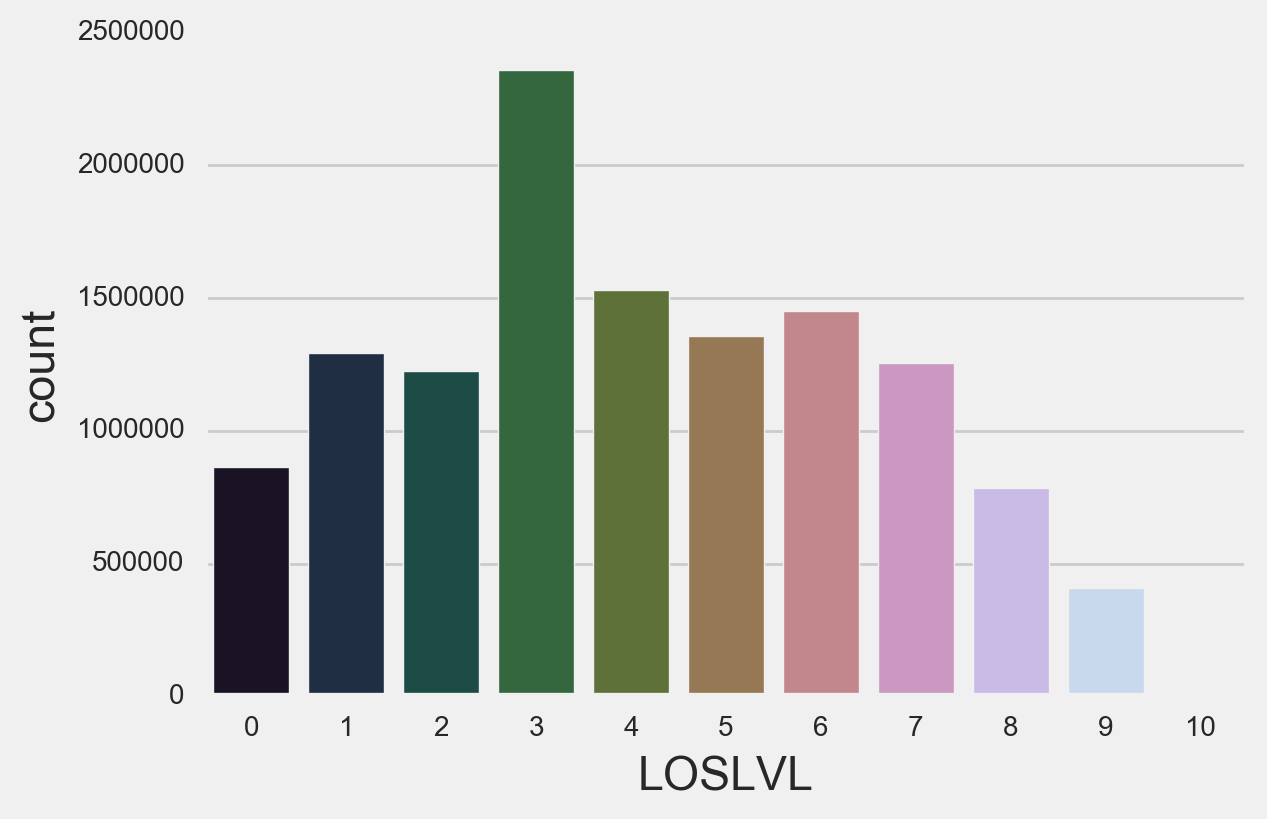

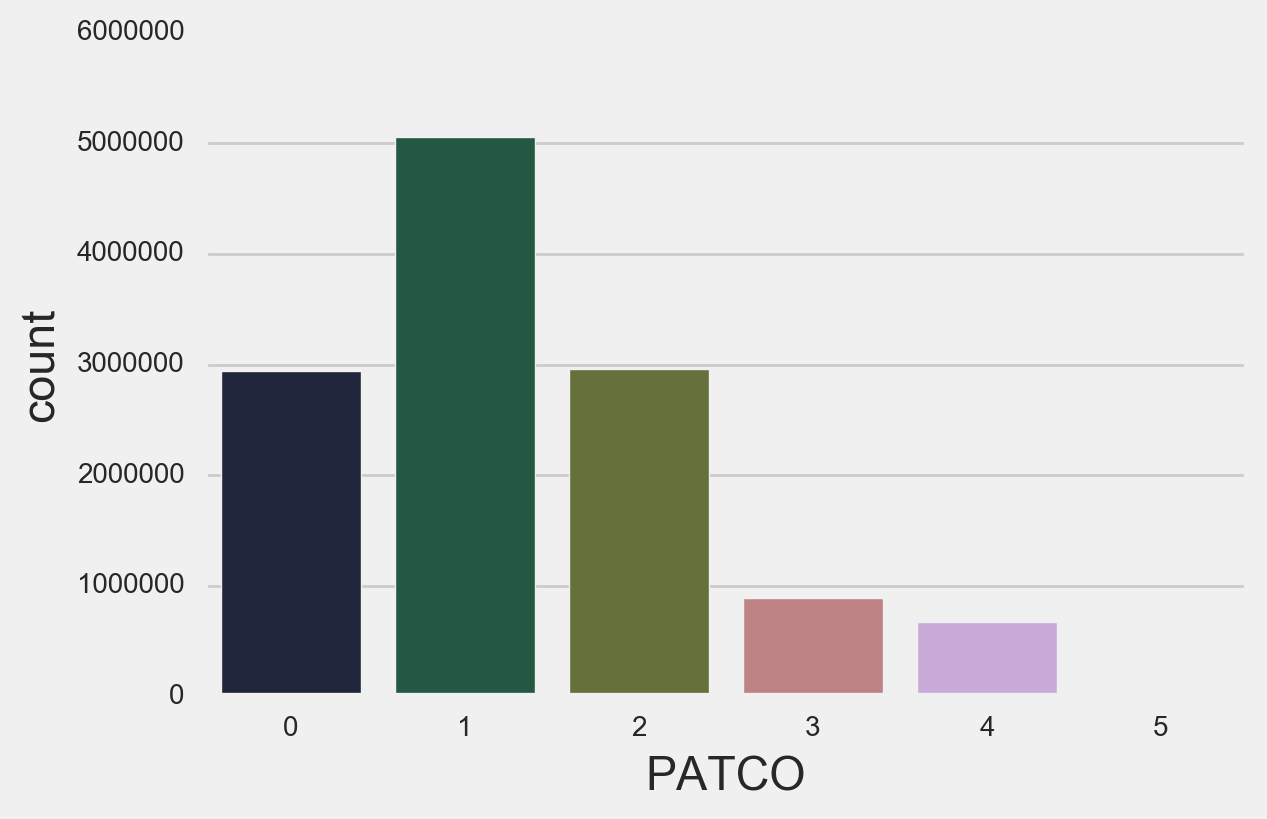

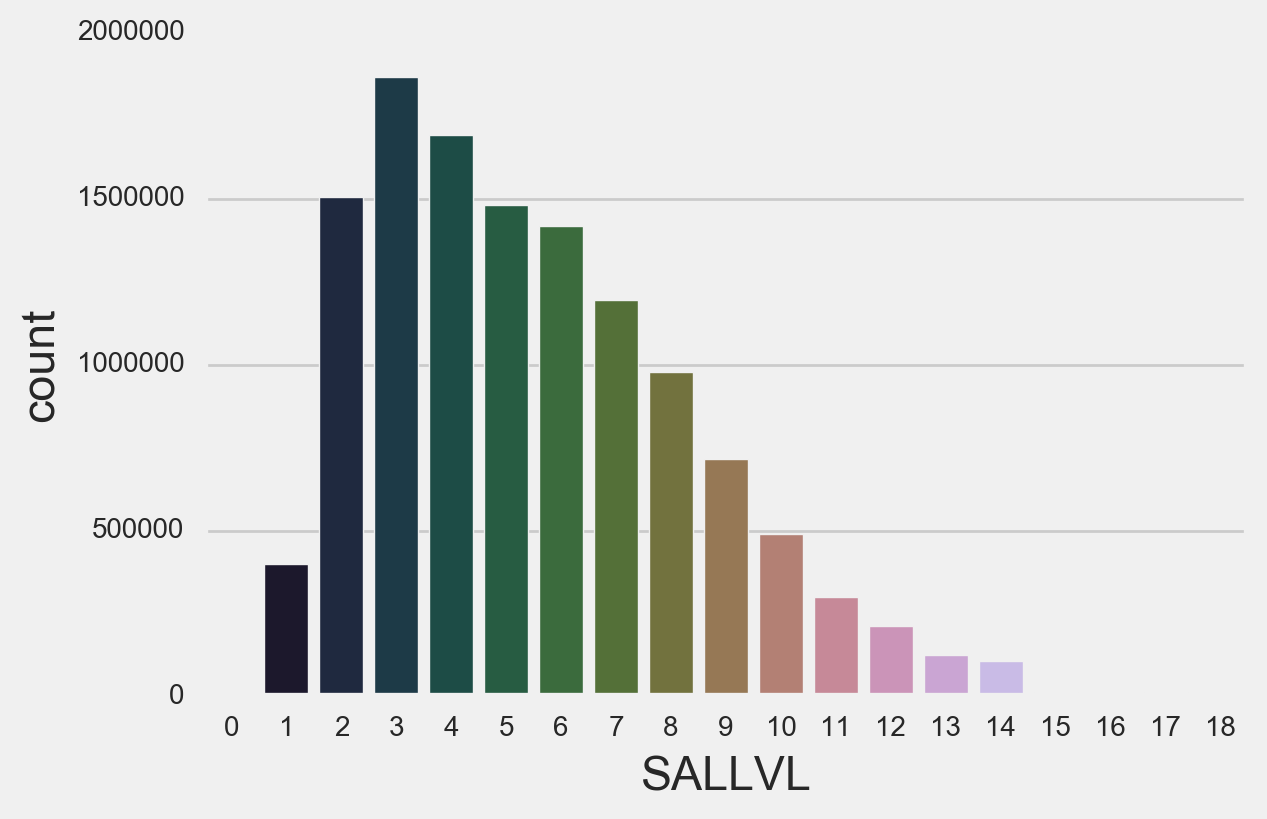

In [59]:
for x in key_var: 
    plt.figure(x)
    sns.countplot(x=x, data=master_df, palette = "cubehelix")

## Agency and Key Variable Cross Tabulations

In [72]:

def tables(column_name):
    crosstable = pd.crosstab(index=master_df["AGYSUB"], columns=master_df[column_name])
    return crosstable

In [73]:
tables('AGELVL')

AGELVL,0,1,2,3,4,5,6,7,8,9,10,11
AGYSUB,,,,,,,,,,,,
AF,5642,24834,63328,86407,93079,137289,203655,223132,159631,76602,28838,1
AG,13541,61859,79195,84674,88885,104689,135076,169623,146660,72172,26516,0
AR,3791,45100,129688,165439,172459,226892,298362,326949,262445,133700,51431,1
CM,338,9283,29431,33994,33535,37623,39604,37845,29442,16082,7303,0
DD,780,13395,41018,50521,51274,75223,115356,143092,119702,63673,23388,0
DJ,552,16901,62076,94828,118612,129171,124484,90001,43137,18325,6836,1
DL,410,3416,10911,15344,17083,20737,24206,27643,26847,16187,5979,0
DN,217,2235,7589,10151,10914,14335,19141,23107,20762,11650,4846,0
ED,142,1068,2777,4011,4873,5786,6062,6394,6168,4201,1823,0


In [74]:
tables('GSEGRD')

GSEGRD,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
AGYSUB,,,,,,,,,,,,,,,
AF,1301,3679,7163,22958,69157,54926,107758,19252,155455,13525,210386,233011,143292,45311,15264
AG,3446,5251,37122,56464,67644,40049,142084,40176,137840,7742,132201,150046,94066,44095,24664
AR,857,2600,7350,84873,141981,126987,218604,41673,220914,27221,296711,320160,225821,75408,25097
CM,111,171,383,6471,7076,4286,21229,3393,19460,1539,27570,51554,56204,52635,22398
DD,203,389,7322,18741,40102,46521,58246,8082,47382,1626,122473,165507,104604,47868,28356
DJ,106,501,665,2384,19631,29596,109941,85160,67737,13777,91721,78104,88852,59181,57568
DL,70,174,535,1598,3070,4844,10954,2360,9990,224,13995,59608,33191,18441,9709
DN,38,98,182,742,613,830,3721,2120,5697,720,8646,17689,35144,27557,21150
ED,15,53,172,441,311,257,1454,566,2152,19,2763,8026,11402,9740,5934


In [75]:
tables('LOSLVL')

LOSLVL,0,1,2,3,4,5,6,7,8,9,10
AGYSUB,,,,,,,,,,,
AF,83086,120265,113548,206945,136411,106795,119926,120107,67626,27726,3
AG,99126,92954,72785,150186,115427,110116,119252,107855,76661,38527,1
AR,125356,213761,213706,385682,202602,149948,178947,179432,113796,53004,23
CM,20957,29937,24863,50278,34883,33933,31570,22545,14573,10941,0
DD,34694,60904,62896,118421,66369,66057,94293,100928,63504,29356,0
DJ,41907,64780,60873,129828,107416,112955,95931,54239,25011,11960,24
DL,9841,15423,14259,29573,21035,19817,19570,16205,13233,9807,0
DN,6169,9743,9591,18444,12808,14867,17608,15842,12273,7602,0
ED,2351,3382,3218,6535,5101,5665,5482,4920,3936,2715,0


In [76]:
tables('PATCO')

PATCO,0,1,2,3,4,5
AGYSUB,,,,,,
AF,207775,523819,240935,80848,49019,42
AG,282927,234497,420477,37920,6991,78
AR,401733,718180,456866,143808,95643,27
CM,157405,74136,26326,15604,1004,5
DD,184098,342315,121084,41567,8354,4
DJ,117653,300811,70563,30333,185561,3
DL,37619,110361,13540,6195,1023,25
DN,54833,58634,6376,2994,2076,34
ED,12640,26920,2364,1094,231,56


In [77]:
tables('SALLVL')

SALLVL,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
AGYSUB,,,,,,,,,,,,,,,,,,,
AF,751,27797,115688,160291,172531,169154,154787,109695,79000,51611,25409,15610,9076,5159,3369,1050,89,280,1091
AG,1495,104994,115309,161594,149711,117669,96414,82991,53350,37581,23241,14859,11129,6701,4753,11,1,0,1087
AR,331,64636,272664,297036,251972,230897,202332,166192,130232,85178,49315,24877,16120,8813,5990,3096,592,2951,3033
CM,80,3170,11614,17406,20105,28220,34381,32706,32426,24909,21538,17282,13618,9554,7385,7,0,0,79
DD,105,14717,73108,86815,69573,84679,96234,85271,65309,42528,28147,16730,13042,7988,7260,4375,86,705,750
DJ,68,2981,29967,105608,154387,95344,71199,52994,45252,40436,30502,23735,19976,14214,17354,11,2,0,894
DL,31,1666,6889,14268,14274,15023,26226,27379,20894,14690,10430,6438,5098,2911,2492,0,8,0,46
DN,11,829,2035,5200,7402,8575,11260,13121,16093,16916,13271,9992,8858,5492,5866,10,0,0,16
ED,13,496,820,1541,2488,2883,4154,5002,5623,5494,4746,3447,3134,1596,1856,7,0,0,5


# Analysis

## Regression Tree

In [78]:
#Creating Variables 
Y = master_df.SEP 
X = master_df[['AGELVL', 'GSEGRD', 'LOSLVL', 'PATCO', 'SALLVL']]

In [80]:
#Test and Train 

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(8774497, 5) (3760500, 5)


(8774497,) (3760500,)


In [98]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [ ]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.6min


In [ ]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

In [ ]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [ ]:
feature_importance(X, dtr_best)

In [ ]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

In [ ]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

In [ ]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [ ]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Logistic Regressions

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [ ]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Employed', 'True_Label_1 Quit'],
                         columns=['Predict_Label_0 Employed', 'Predict_Label_1 Quit'])

confusion

In [ ]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Findings 

## Technical  

## Non-Technical 